In [1]:
import cv2, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap='gray')
    plt.show()

## 이미지 임계처리

이진화 처리는 간단하지만, 쉽지 않은 문제를 가지고 있다. **이진화**란 영상을 흑/백으로 분류하여 처리하는 것을 말합니다. 이때 기준이 되는 임계값을 어떻게 결정할 것인지가 중요한 문제가 됩니다. 임계값보다 크면 백, 작으면 흑이 됩니다. 기본 임계처리는 사용자가 고정된 임계값을 결정하고 그 결과를 보여주는 단순한 형태입니다.

이때 사용하는 함수가 cv2.threshold() 입니다.

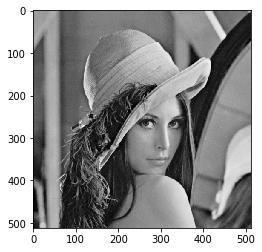

In [2]:
image = cv2.imread('Lena.png', 0)  # 0 은 흑백으로 읽으라는 뜻
plt.imshow(image, cmap='gray')

Threshold used: 127.0
Threshold used: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


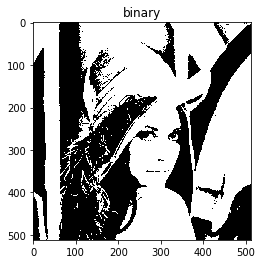

In [3]:
thr, mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

print('Threshold used:', thr)
print('Threshold used:', mask)
imshow("binary", mask)

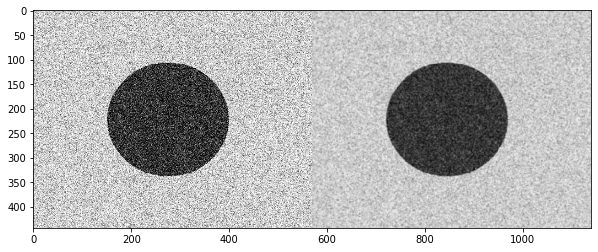

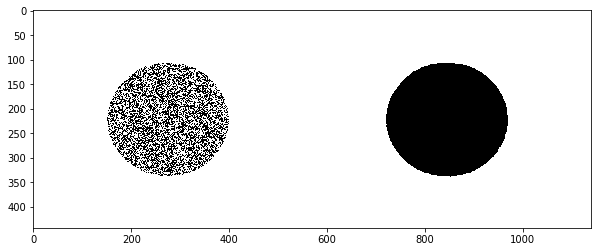

In [4]:
image = cv2.imread('circle.png', 0)  # 0 은 흑백으로 읽으라는 뜻
_,binary = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)  # 임계값(thresh)를 잘 찾는 것이 중요한데 찾기 어려움....
                                                            # _는 굳이 저장할 필요가 없는 불필요 요소를 지정해주지 않으려고 씀
img_blur = cv2.GaussianBlur(image, (5,5), 0)
_, binary_blur = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)


fig=plt.figure(figsize=(10,5))
imshow("", np.hstack([image, img_blur]))

fig=plt.figure(figsize=(10,5))
imshow("", np.hstack([binary, binary_blur]))

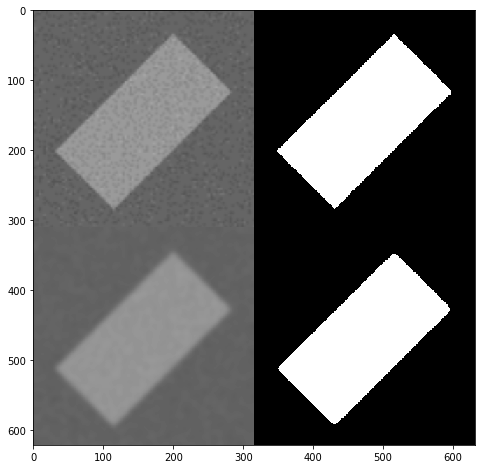

In [5]:
image = cv2.imread('boxnoise.png', 0)
img_blur = cv2.GaussianBlur(image, (21,21), 0)
_,binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)  # thresh를 어떻게 조정하느냐에 따라서 노이즈가 끼는 경우도 있고 없는 경우도 있음
_, binary_blur = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)


fig=plt.figure(figsize=(15,8))
imshow("", np.hstack([np.vstack([image, img_blur]), np.vstack([binary, binary_blur])]))

---

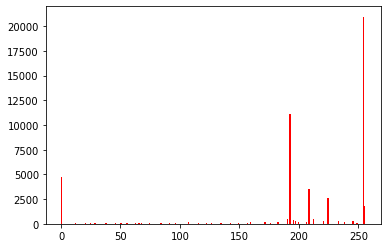

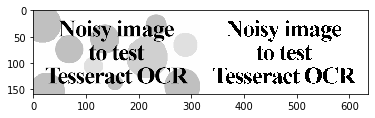

In [6]:
image = cv2.imread('ocr.png', 0)
img_blur = cv2.GaussianBlur(image, (23,23), 0)
_,binary = cv2.threshold(
    image, 20, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.hist(image.ravel(), 256,[0,256], color='r')
plt.show()


imshow("", np.hstack([image, binary]))

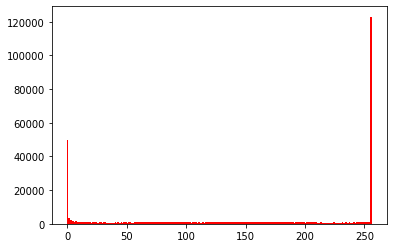

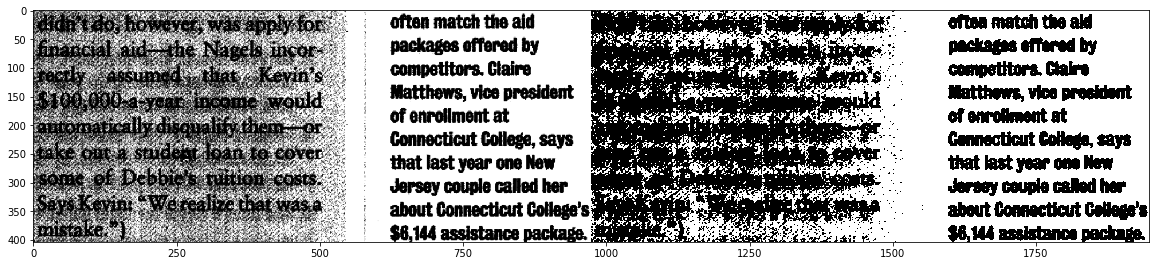

In [7]:
image = cv2.imread('ocr2.png', 0)
img_blur = cv2.GaussianBlur(image, (3,3), 0)
_,binary = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.hist(image.ravel(), 256,[0,256], color='r')


fig=plt.figure(figsize=(20,10))
imshow("", np.hstack([image, binary]))

---

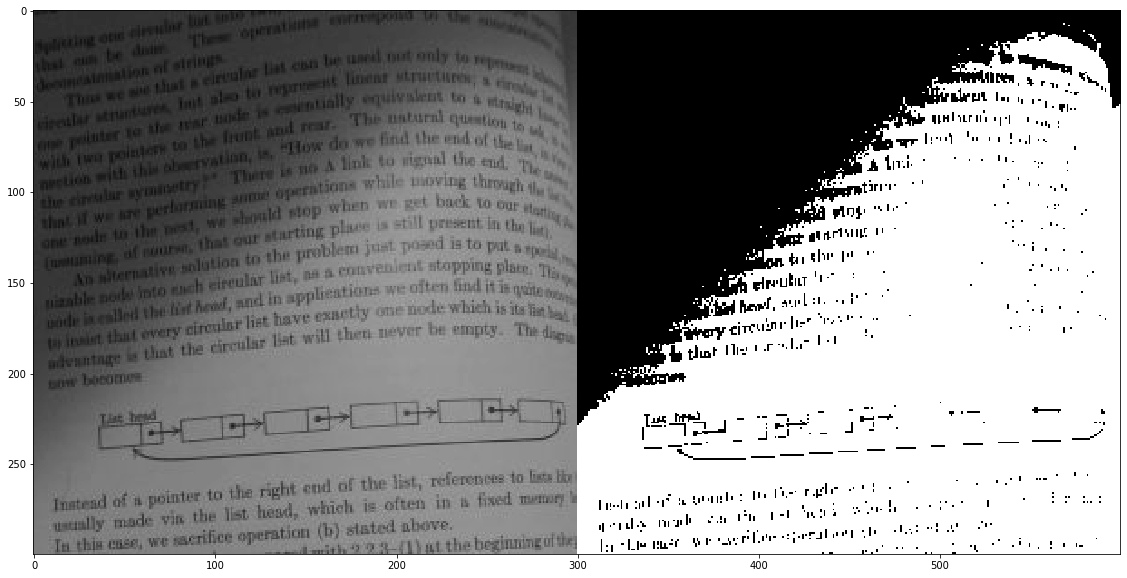

In [8]:
image = cv2.imread('text.jpg', 0)
img_blur = cv2.GaussianBlur(image, (3,3), 0)
_,binary = cv2.threshold(image, 80, 255, cv2.THRESH_BINARY)

# plt.hist(image.ravel(), 256,[0,256], color='r')


fig=plt.figure(figsize=(20,10))
imshow("", np.hstack([image, binary]))

## adaptiveThreshold

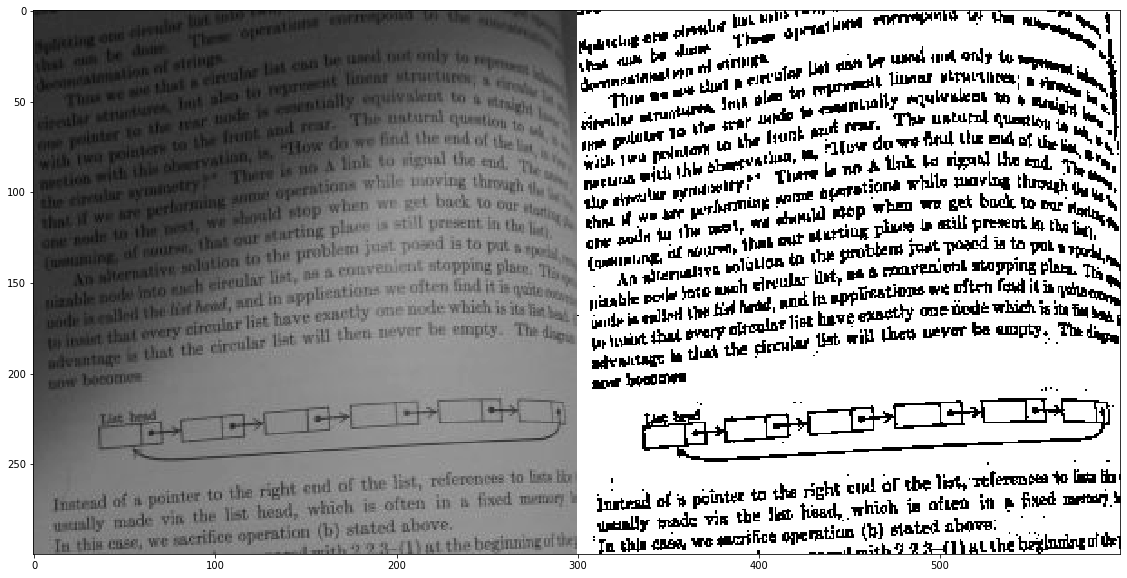

In [9]:
image = cv2.imread('text.jpg', 0)
# img_blur = cv2.GaussianBlur(image, (3,3), 0)
binary = cv2.adaptiveThreshold(image, 255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 21 ,5)   # 21은 블록의 사이즈로 수치가 클수록 사진을 더 잘게 나눔
                                                          # 2는 Gaussian의 평균을 2만큼 뺀 값으로 삼겠다는 것

# plt.hist(image.ravel(), 256,[0,256], color='r')


fig=plt.figure(figsize=(20,10))
imshow("", np.hstack([image, binary]))

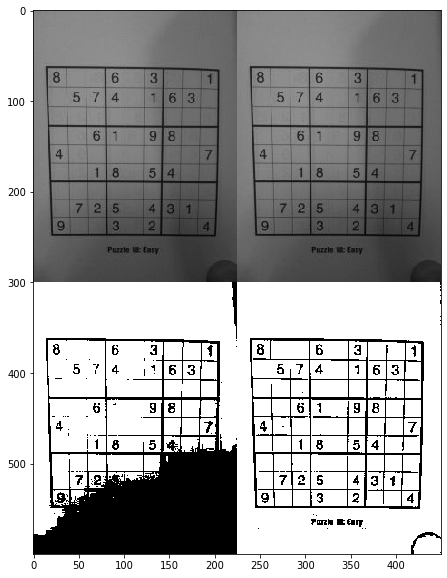

In [10]:
image = cv2.imread('grid.jpg', 0)
img_blur = cv2.GaussianBlur(image, (1,1), 0)
_,binary_otsu = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary_adaptive = cv2.adaptiveThreshold(image, 255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 21, 4.5)   # 21은 블록의 사이즈로 수치가 클수록 사진을 더 잘게 나눔
                                                          # 2는 Gaussian의 평균을 2만큼 뺀 값으로 삼겠다는 것
fig=plt.figure(figsize=(20,10))
imshow("", np.hstack([np.vstack([image, binary_otsu]), np.vstack([image, binary_adaptive]) ])  )

In [11]:
image = cv2.imread('mart.jpg', 0)
img_blur = cv2.GaussianBlur(image, (15,15), 0)
_,binary_otsu = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary_adaptive = cv2.adaptiveThreshold(image, 255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 21, 4.5)   # 21은 블록의 사이즈로 수치가 클수록 사진을 더 잘게 나눔
                                                          # 2는 Gaussian의 평균을 2만큼 뺀 값으로 삼겠다는 것

# imshow("", np.hstack([np.vstack([image, binary_otsu]), np.vstack([image, binary_adaptive]) ])  )

cv2.imwrite("output.jpg", binary_otsu)


True

<img src='output.jpg' width=500>

---

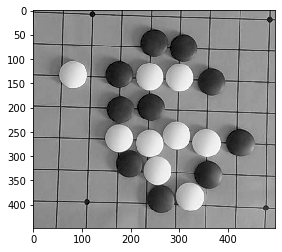

In [12]:
image = cv2.imread('stone.png', 0)
imshow("", image)

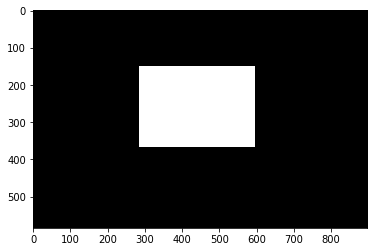

[array([[[285, 149]],

       [[285, 367]],

       [[593, 367]],

       [[593, 149]]], dtype=int32)]


In [13]:
img = cv2.imread('shape4.png',0)
thr, mask = cv2.threshold(img,0,255,
                         cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow("", mask)

## 외곽정보를 찾아주는 함수 findContours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 꼭지점들의 좌표
print(contours)   # 외곽선을 찾아서 중요지점들을 알려줌



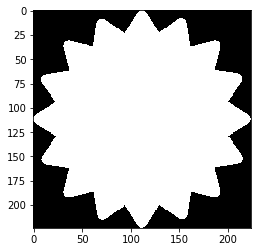

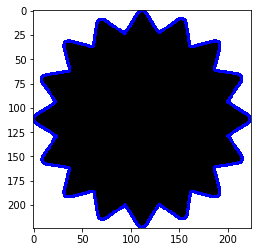

In [14]:
img = cv2.imread('shape5.png',0)
thr, mask = cv2.threshold(img,0,255,
                         cv2.THRESH_BINARY+cv2.THRESH_OTSU)

mask = 255 - mask # 색 반전시켜줌

imshow("", mask)

## 외곽정보를 찾아주는 함수 findContours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # Approximation을 시켜서 불필요한 점은 뺀거

image = cv2.imread("shape5.png")
cv2.drawContours(image, contours, -1, (255,0,0), 2)   # (255, 0, 0) --> 파란색,   2:파란선 굵기

imshow("", image)

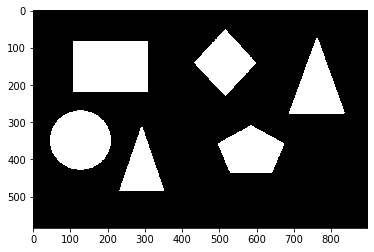

shape = 6
shape = 240
shape = 300
shape = 226
shape = 4
shape = 298
shape = 56


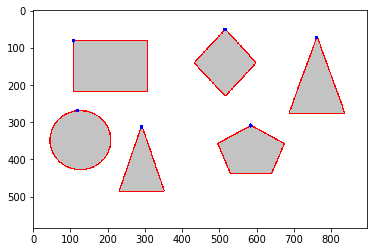

In [20]:
img = cv2.imread('shape3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr, mask = cv2.threshold(gray, 0, 255,
                          cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask = 255 - mask

imshow("", mask)

## 외곽정보를 찾아주는 함수 findContours
contours, _ = cv2.findContours(mask, 
                               cv2.RETR_EXTERNAL, 
                               cv2.CHAIN_APPROX_SIMPLE)  # Approximation을 시켜서 불필요한 점은 뺀거

print(f"shape = {len(contours)}")


for con in contours : 
    print(f"shape = {len(con)}")
    x = con[0][0][0]      # con[0][0] : contour의 시작점
    y = con[0][0][1]
    cv2.drawContours(img, [con], -1, (0,0,255), 2)
    cv2.circle(img, (x,y), 5, (255,0,0), -1)

# image = cv2.imread("shape3.png")
# cv2.drawContours(gray, contours, -1, (255,0,0), 2)

imshow("", img)

## contour의 길이

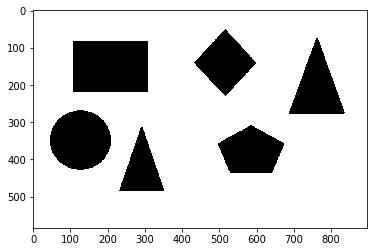

shape = 6
shape = 240 length = 513.7056245803833, appox = 3
shape = 300 length = 515.9310202598572, appox = 5
shape = 226 length = 531.8721435070038, appox = 8
shape = 4 length = 672.0, appox = 4
shape = 298 length = 616.7178171873093, appox = 3
shape = 56 length = 493.0336227416992, appox = 4


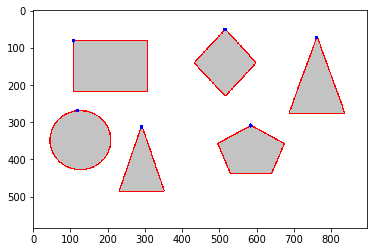

In [29]:
img = cv2.imread('shape3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr, mask = cv2.threshold(gray, 0, 255,
                          cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imshow("", mask)
mask = 255 - mask


## 외곽정보를 찾아주는 함수 findContours
contours, _ = cv2.findContours(mask, 
                               cv2.RETR_EXTERNAL, 
                               cv2.CHAIN_APPROX_SIMPLE)  # Approximation을 시켜서 불필요한 점은 뺀거

print(f"shape = {len(contours)}")


for con in contours : 
    peri = cv2.arcLength(con, True) # True는 폐곡선으로 하겠다, False는 그냥 원래 곡선으로 하겠다.
    approx = cv2.approxPolyDP(con, 0.02*peri, True)
    
    print(f"shape = {len(con)} length = {peri}, appox = {len(approx)}")
    x = con[0][0][0]      # con[0][0] : contour의 시작점
    y = con[0][0][1]
    cv2.drawContours(img, [con], -1, (0,0,255), 2)
    cv2.circle(img, (x,y), 5, (255,0,0), -1)

# image = cv2.imread("shape3.png")
# cv2.drawContours(gray, contours, -1, (255,0,0), 2)

imshow("", img)

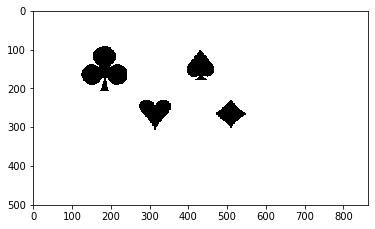

shape = 4
shape = 160 length = 313.53910398483276, appox = 9
shape = 184 length = 270.5096664428711, appox = 4
shape = 124 length = 312.56854152679443, appox = 9
shape = 270 length = 582.634556889534, appox = 15


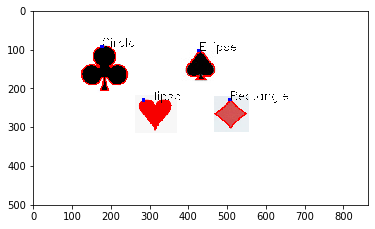

In [64]:
img = cv2.imread('trumph.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr, mask = cv2.threshold(gray, 0, 255,
                          cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imshow("", mask)
mask = 255 - mask


## 외곽정보를 찾아주는 함수 findContours
contours, _ = cv2.findContours(mask, 
                               cv2.RETR_EXTERNAL, 
                               cv2.CHAIN_APPROX_SIMPLE)  # Approximation을 시켜서 불필요한 점은 뺀거

print(f"shape = {len(contours)}")


for con in contours : 
    peri = cv2.arcLength(con, True) # True는 폐곡선으로 하겠다, False는 그냥 원래 곡선으로 하겠다.
    approx = cv2.approxPolyDP(con, 0.02*peri, True)
    
    print(f"shape = {len(con)} length = {peri}, appox = {len(approx)}")
#     x = con[0][0][0]      # con[0][0] : contour의 시작점
#     y = con[0][0][1]
    p = tuple(con[0][0])
    cv2.drawContours(img, [con], -1, (0,0,255), 2)
    cv2.circle(img, p, 5, (255,0,0), -1)

    area = cv2.contourArea(con)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    if len(approx) == 3:
        cv2.putText(img, "Triangle", p, font, 1, (0))
    elif len(approx) == 4:
        cv2.putText(img, "Rectangle", p, font, 1, (0))
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", p, font, 1, (0))
    elif len(approx) < 15:
        cv2.putText(img, "Ellipse", p, font, 1, (0))
    else:
        cv2.putText(img, "Circle", p, font, 1, (0))
    
# image = cv2.imread("shape3.png")
# cv2.drawContours(gray, contours, -1, (255,0,0), 2)

imshow("", img)





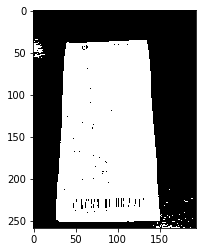

True

In [72]:
img = cv2.imread('mart2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr, mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# mask = 255-mask
imshow("", mask)

cv2.imwrite("output2.png", mask)

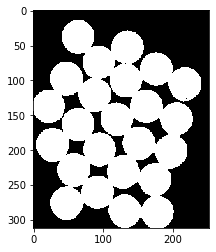

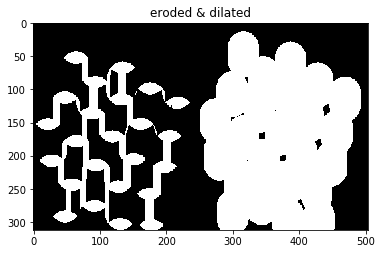

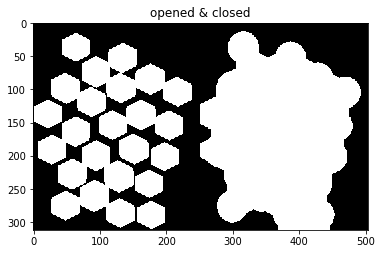

In [118]:
image = cv2.imread('water_coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
binary = 255- binary
imshow("", binary)

# 침식
eroded =  cv2.morphologyEx(binary, cv2.MORPH_ERODE, (3,3), iterations=30)

# 팽창
dilated = cv2.morphologyEx(binary, cv2.MORPH_DILATE, (3,3), iterations = 20) 
imshow("eroded & dilated", np.hstack([eroded, dilated]))  # 표시하기



# 침식 후 팽창
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN,
                        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
                          iterations = 10)

# 팽창 후 침식
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE,
                        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
                        iterations = 5)
imshow("opened & closed", np.hstack([opened, closed]))

---

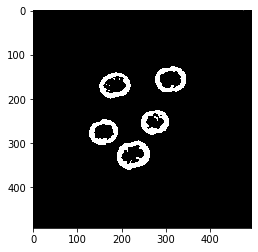

In [121]:
frame = cv2.imread("coin.png")
roi = frame.copy()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (7,7), 0)

thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY_INV, 45,6)   # THRESH_BINARY_INV에서 INV는 255-binary한 것임

imshow("", thresh)

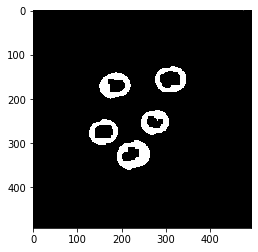

In [129]:
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)
imshow("", closing)

6


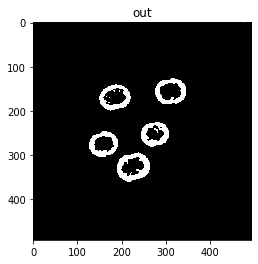

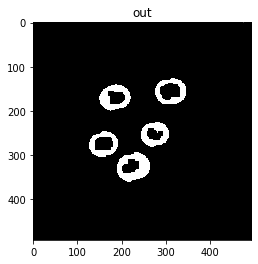

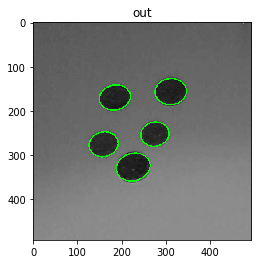

In [142]:
cont_img = closing.copy()   
contours,_ = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
                             cv2.CHAIN_APPROX_SIMPLE)       # 여기서 cont_img라는 카피본을 쓰는 이유는 findContours 함수가 적용 이후에
                                                            # 원본이 바뀌기 때문에(inplace=True 같은 느낌) 카피본을 씀

for cnt in contours:
#     area = cv2.contourArea(cnt)
#     if area < 2000 or area > 4000:
#         continue
#     if len(cnt) < 5:
#         continue
    ellipse = cv2.fitEllipse(cnt)  # 타원을 만들어주는 함수
    cv2.ellipse(roi, ellipse, (0,255,0), 2)   # 타원에 대한 함수  2: 타원의 굵기?

    
print(len(contours))
    
imshow("out", thresh)
imshow("out", cont_img)
imshow("out", roi)

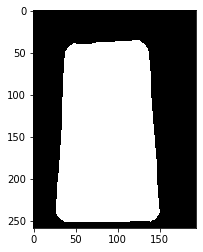

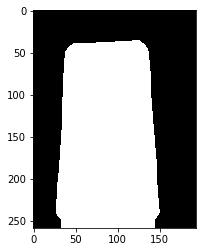

1
shape = 1
shape=82  length=656.6101719141006  approx=4   area=24147.5


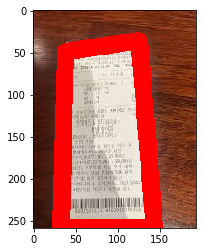

True

In [153]:
img = cv2.imread('mart2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray = cv2.medianBlur(gray, 21)
thr, mask = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow("", mask)

kernel = np.ones((5, 5), np.uint8)           
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=5)   
imshow("", closing)                                 

contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))    

print(  f"shape = {len(contours)}"  )


colors = [(255,0,0), (0,255,0), (0,0,255), (255,255,0), (255,0,255)]

maxArea = 0

for i in range(len(contours)) :        
    con = contours[i]
    peri = cv2.arcLength(con, True)
    area = cv2.contourArea(con)  
    approx = cv2.approxPolyDP(con, 0.02 * peri, True)    
    print(  f"shape={len(con)}  length={peri}  approx={len(approx)}   area={area}"  )    
    if area > maxArea  :
        maxArea = area
        maxContour = approx
    
cv2.drawContours(img, [maxContour], -1, (0,0,255), 20)
   
    
imshow("", img)
cv2.imwrite("output.jpg", img)

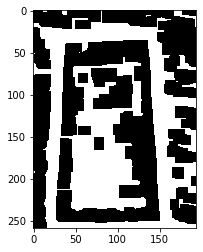

In [150]:
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)
imshow("", closing)

11


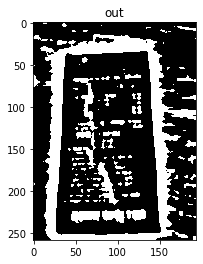

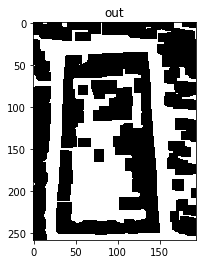

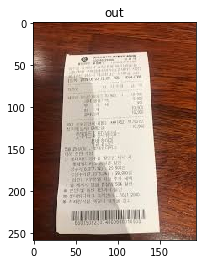

In [148]:
cont_img = closing.copy()   
contours,_ = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
                             cv2.CHAIN_APPROX_SIMPLE)       # 여기서 cont_img라는 카피본을 쓰는 이유는 findContours 함수가 적용 이후에
                                                            # 원본이 바뀌기 때문에(inplace=True 같은 느낌) 카피본을 씀

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:   #원하는 모양(동전) 이외의 것 제외하기
        continue
    if len(cnt) < 5:          # 원의 경우 5보다 크기 때문에, 그 이하의 값을 제외
        continue
    ellipse = cv2.fitEllipse(cnt)  # 타원을 만들어주는 함수
    cv2.ellipse(roi, ellipse, (0,255,0), 2)   # 타원에 대한 함수  2: 타원의 굵기?

    
print(len(contours))
    
imshow("out", thresh)
imshow("out", cont_img)
imshow("out", roi)